In [36]:
def read_fortran(filename):
    """ Reads Fortran style binary data and returns a numpy array.
    """
    with open(filename, 'rb') as file:                                                                              # read size of record
        file.seek(0)
        n = np.fromfile(file, dtype='int32', count=1)[0]

        # read contents of record
        file.seek(4)
        v = np.fromfile(file, dtype='float32')

    return v[:-1]

# True model for scattering simulation
## Amplitude variation: 10 percent.

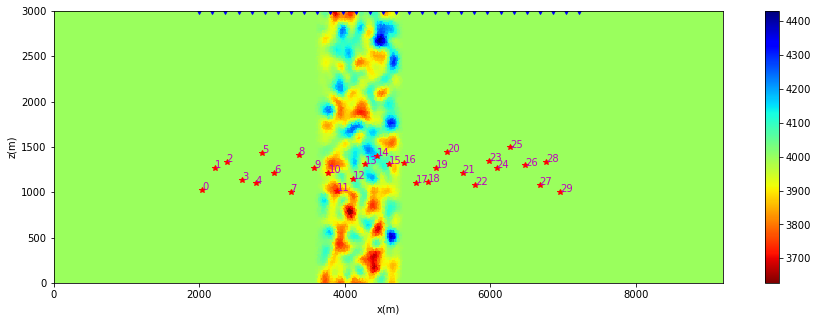

In [222]:
# %load scripts/plotmodel.py
#!/usr/bin/env python
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

src = pd.read_table('data/sources.dat',delim_whitespace=True,names=['x','z'])
rc = pd.read_table('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

x=read_fortran('./model_true/proc000000_x.bin')
z=read_fortran('./model_true/proc000000_z.bin')
vs = read_fortran('./model_true/proc000000_vs.bin')

plt.figure(figsize=(15,5))
sc=plt.tripcolor(x,z,vs,cmap='jet_r')

plt.plot(src['x'],src['z'],'r*')
plt.plot(rc['x'],rc['z'],'bv')
for ii in range(len(src)):
    plt.text(src['x'].iloc[ii],src['z'].iloc[ii],str(ii),color='m')
plt.xlabel('x(m)')
plt.ylabel('z(m)')
plt.xlim([x.min(),x.max()])
plt.ylim([z.min(),z.max()])
plt.colorbar()


# Scattering amplitude: 10 percent

<Figure size 720x720 with 0 Axes>

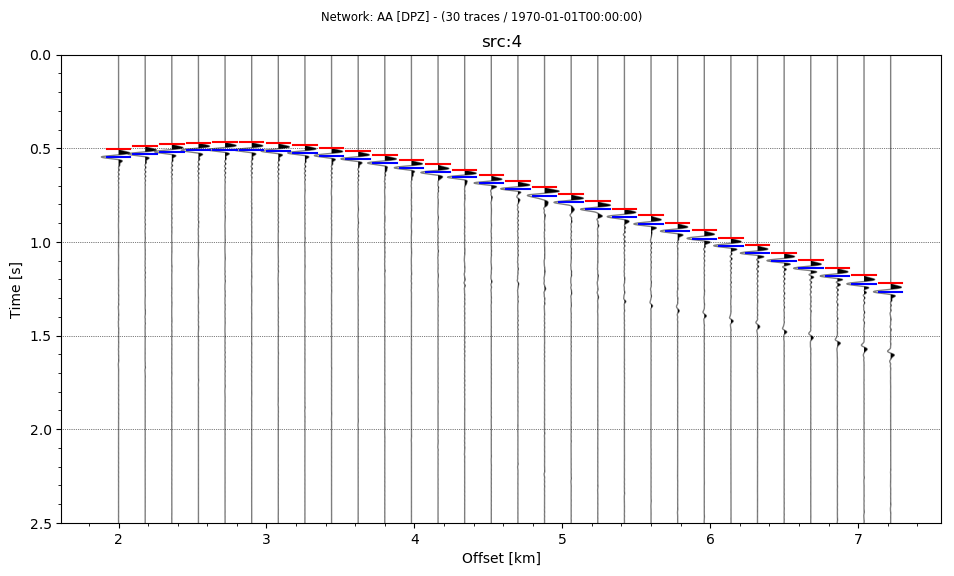

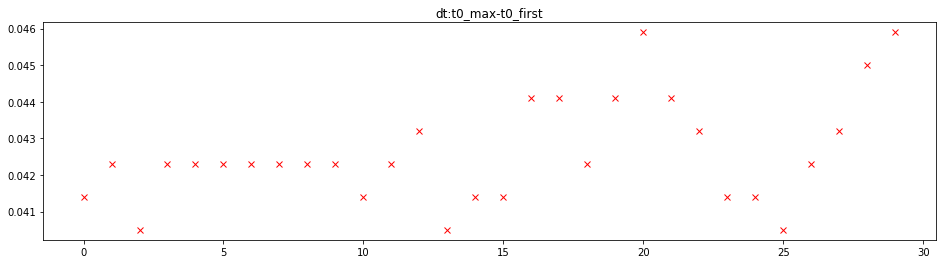

<Figure size 720x720 with 0 Axes>

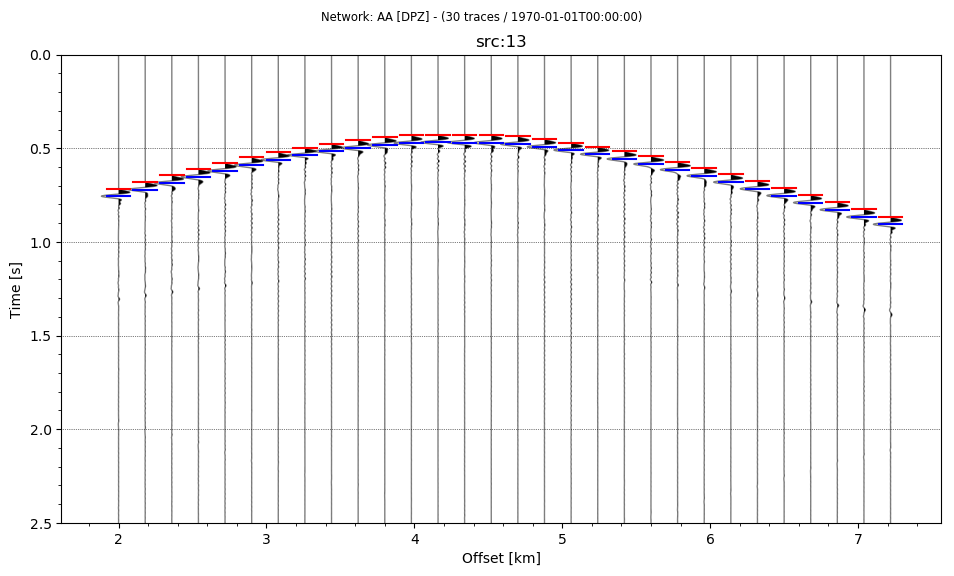

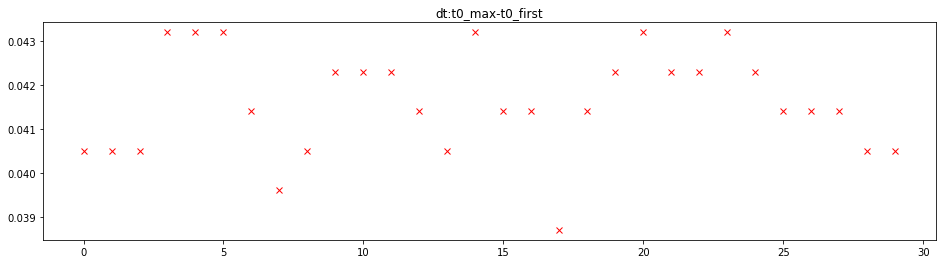

<Figure size 720x720 with 0 Axes>

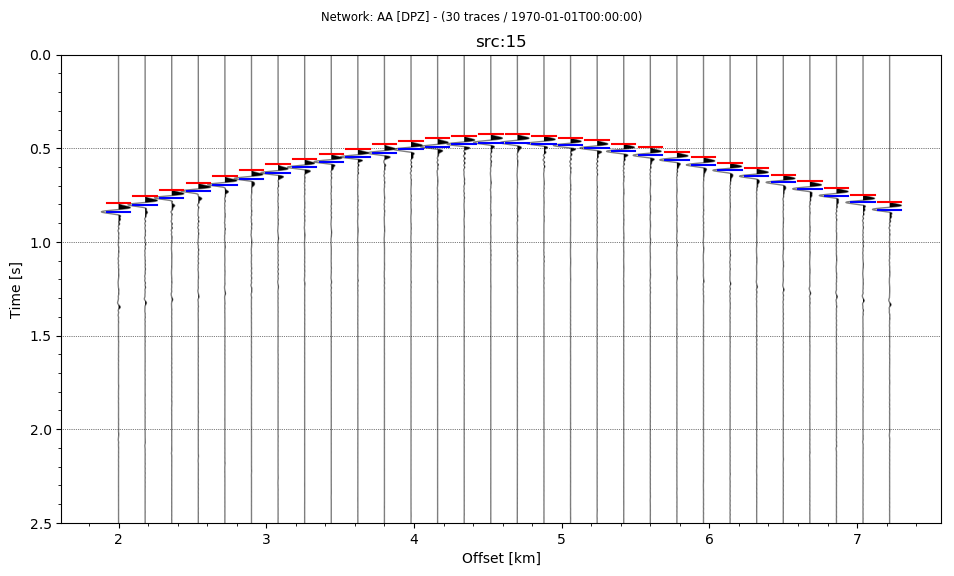

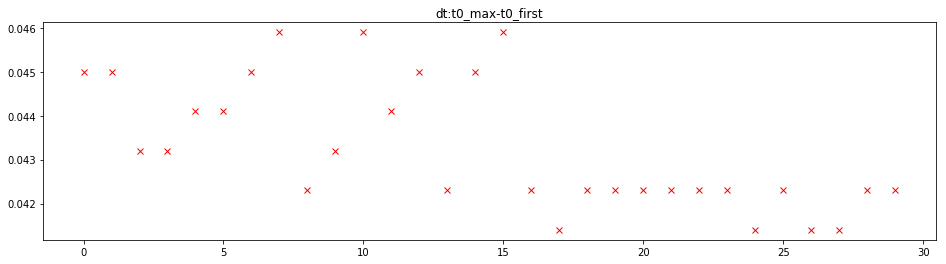

<Figure size 720x720 with 0 Axes>

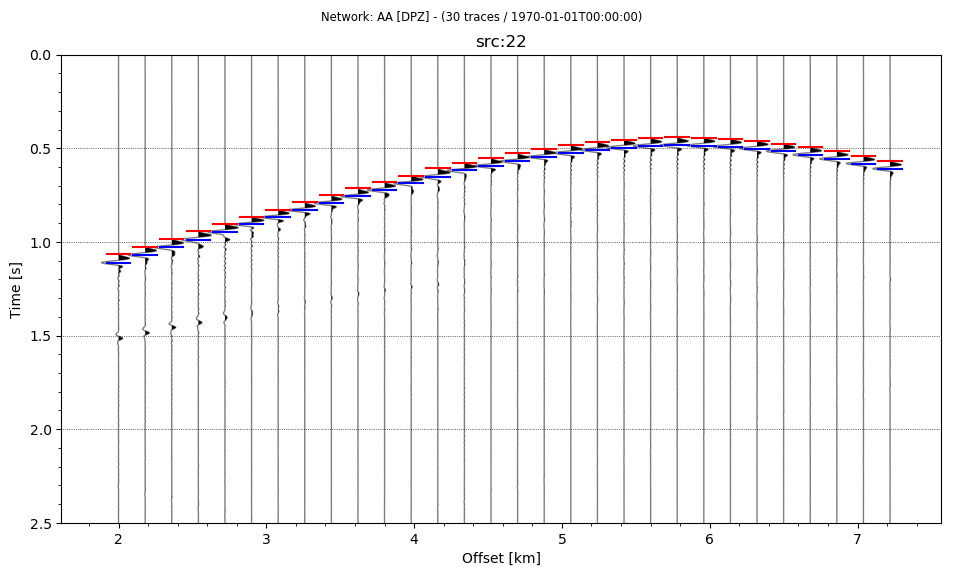

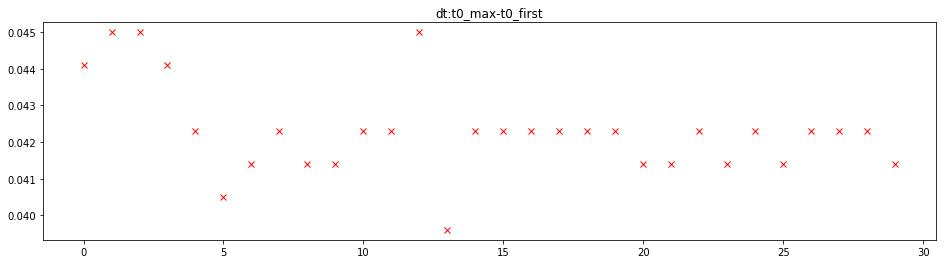

In [241]:
# from obspy import read
# from matplotlib import pyplot as plt
# choosetoshow = [4,13,15,22]
# for isrc  in range(len(choosetoshow)):
#     st = read('data/wfs/'+str(choosetoshow[isrc]).zfill(5)+'.su')
#     fig = plt.figure(figsize=(15,10))
#     for ii in range(len(st)):
#         st[ii].stats.distance=ii*1000/50.0*9.2
#     st.plot(type='section',scale=1.0,time_down=True,recordlength=2.5,fillcolors=('red','None'),fig=fig)
#     plt.title('src:'+str(choosetoshow[isrc]))

from obspy import read
from matplotlib import pyplot as plt
choosetoshow = [4,13,15,22]
ifplot = 1
for isrc  in range(len(choosetoshow)):
    plt.figure(figsize = (10,10))
    dfh = pick('data/wfs/'+str(choosetoshow[isrc]).zfill(5)+'.su', './data/STATIONS',recordlength=2.5,plot=ifplot,thresh=10)
    plt.title('src:'+str(choosetoshow[isrc]))
    plt.figure(figsize = (16,4))
    timediffh = dfh['t0_max']-dfh['t0_first']
    plt.plot(timediffh,'rx')
    plt.title('dt:t0_max-t0_first')

# True model for scattering simulation
## Amplitude variation: 25 percent.

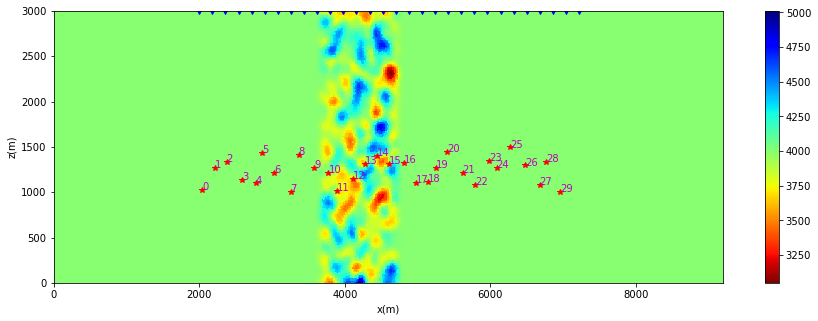

In [228]:
# %load scripts/plotmodel.py
#!/usr/bin/env python
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

src = pd.read_table('data/sources.dat',delim_whitespace=True,names=['x','z'])
rc = pd.read_table('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

x=read_fortran('./model_true/proc000000_x.bin')
z=read_fortran('./model_true/proc000000_z.bin')
vs = read_fortran('./model_true/proc000000_vs.bin')

plt.figure(figsize=(15,5))
sc=plt.tripcolor(x,z,vs,cmap='jet_r')

plt.plot(src['x'],src['z'],'r*')
plt.plot(rc['x'],rc['z'],'bv')
for ii in range(len(src)):
    plt.text(src['x'].iloc[ii],src['z'].iloc[ii],str(ii),color='m')
plt.xlabel('x(m)')
plt.ylabel('z(m)')
plt.xlim([x.min(),x.max()])
plt.ylim([z.min(),z.max()])
plt.colorbar()


<Figure size 720x720 with 0 Axes>

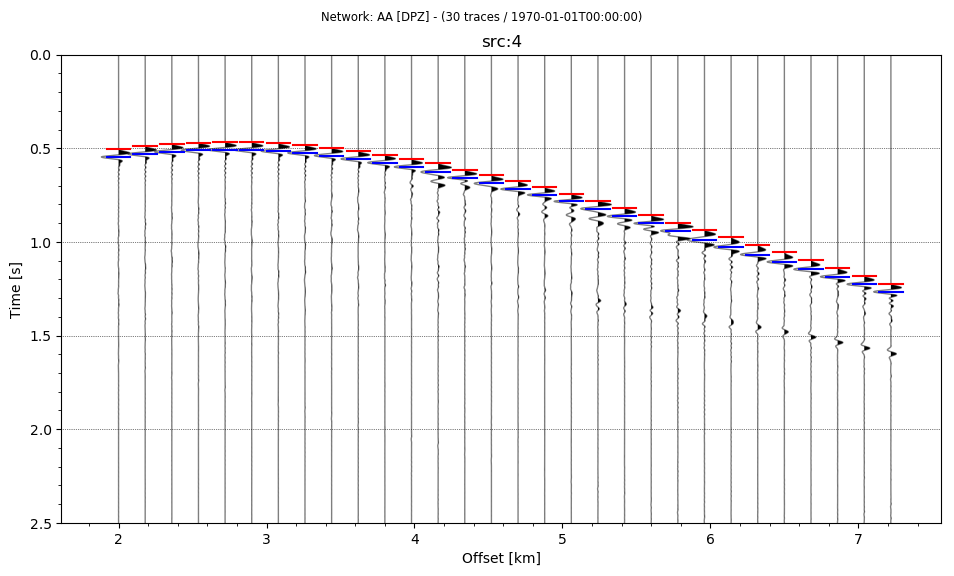

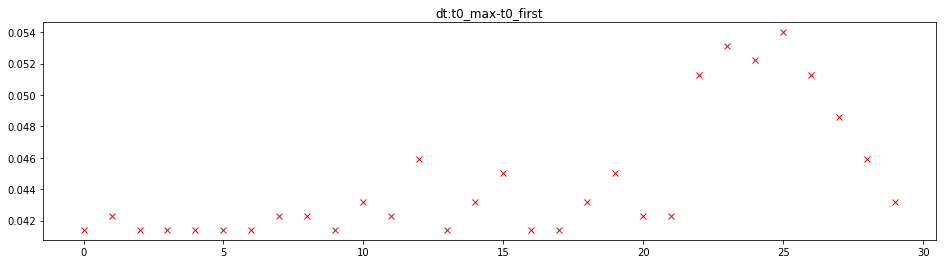

<Figure size 720x720 with 0 Axes>

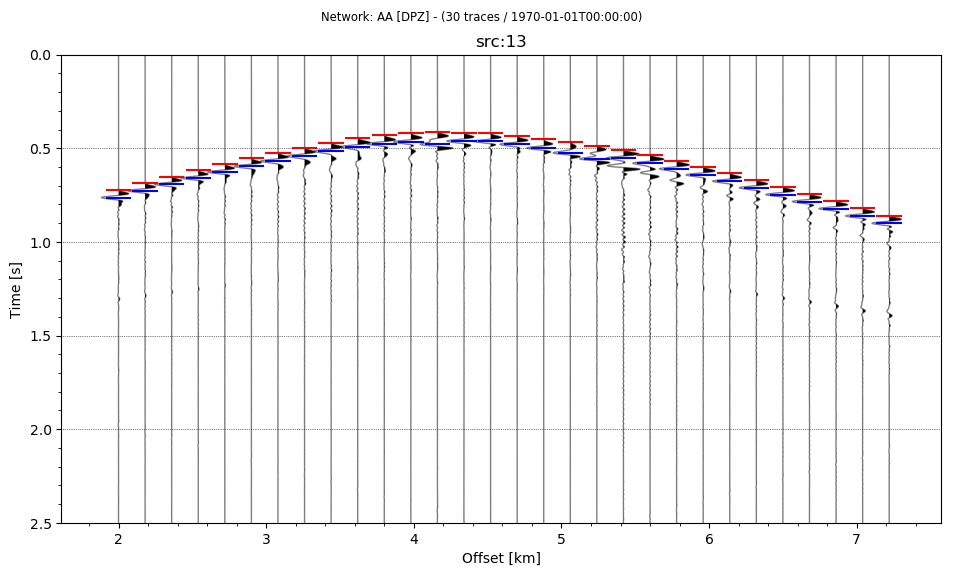

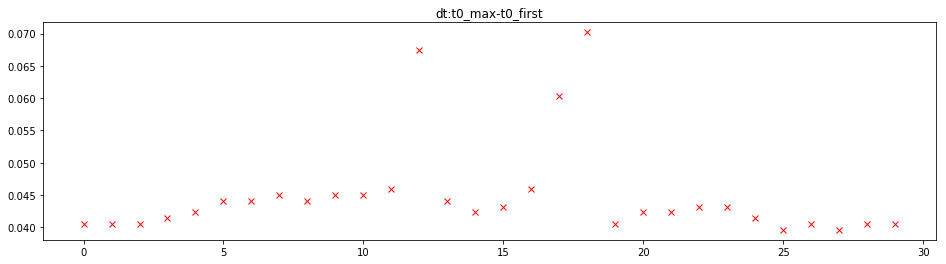

<Figure size 720x720 with 0 Axes>

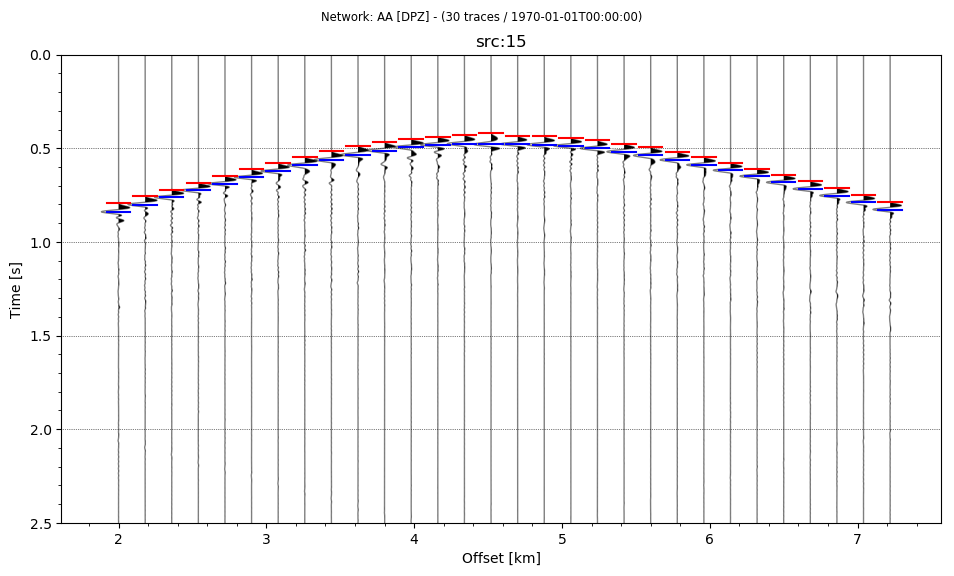

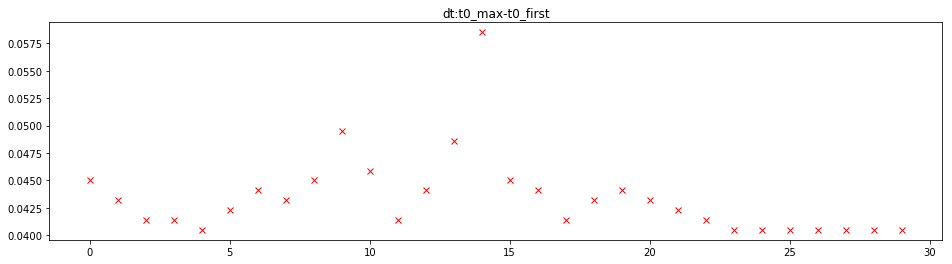

<Figure size 720x720 with 0 Axes>

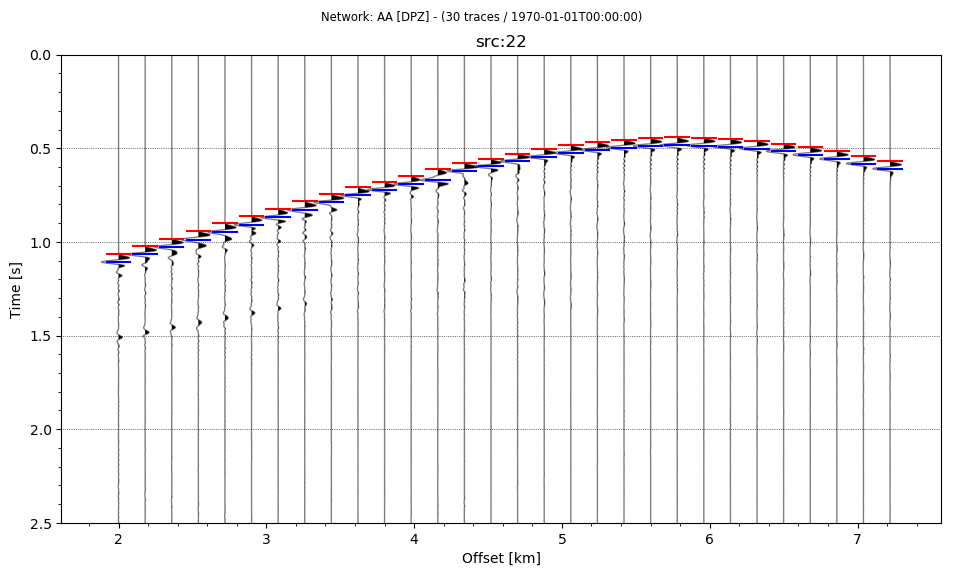

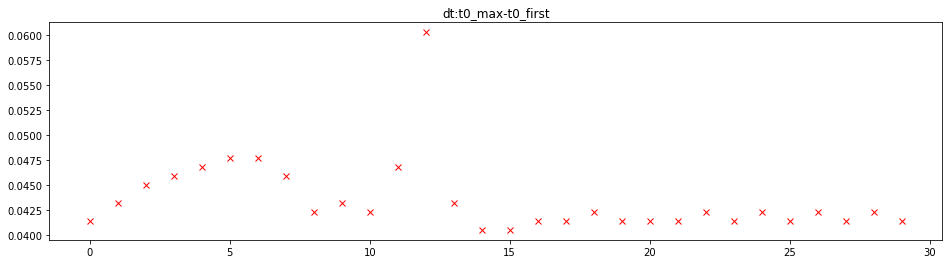

In [242]:
from obspy import read
from matplotlib import pyplot as plt
choosetoshow = [4,13,15,22]
ifplot = 1
for isrc  in range(len(choosetoshow)):
    plt.figure(figsize = (10,10))
    dfh = pick('data/wfs_25/'+str(choosetoshow[isrc]).zfill(5)+'.su', './data/STATIONS',recordlength=2.5,plot=ifplot,thresh=10)
    plt.title('src:'+str(choosetoshow[isrc]))
    plt.figure(figsize = (16,4))
    timediffh = dfh['t0_max']-dfh['t0_first']
    plt.plot(timediffh,'rx')
    plt.title('dt:t0_max-t0_first')

# Homegenenous model without any scatter

<Figure size 720x720 with 0 Axes>

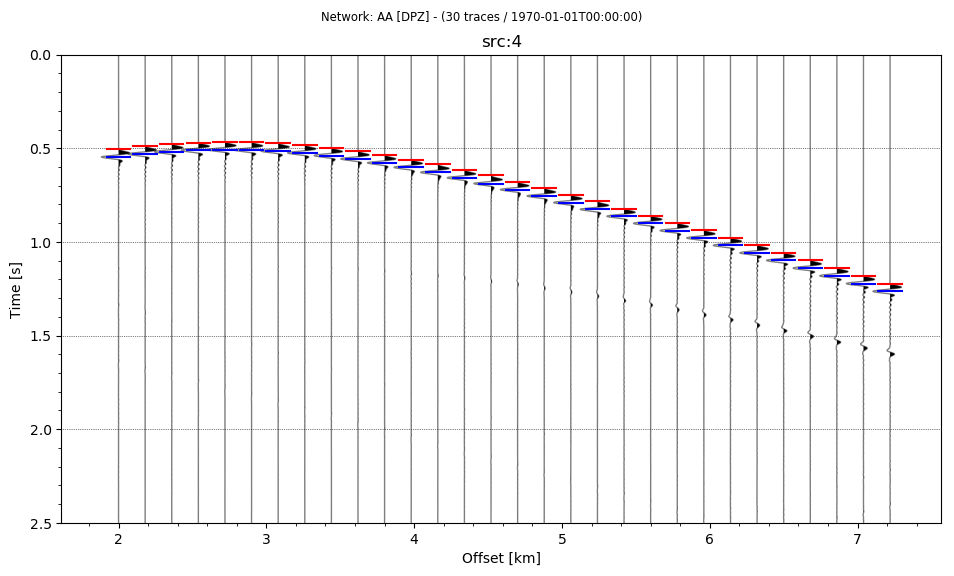

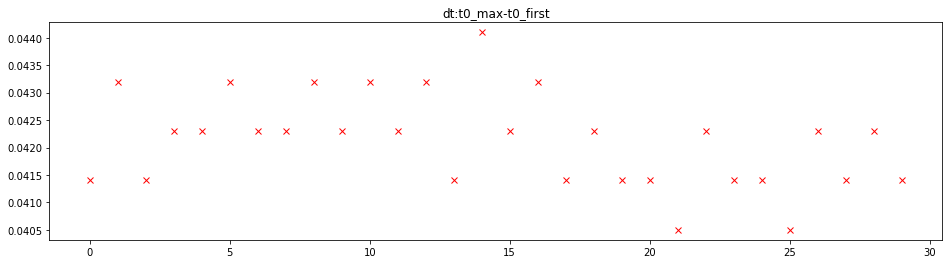

<Figure size 720x720 with 0 Axes>

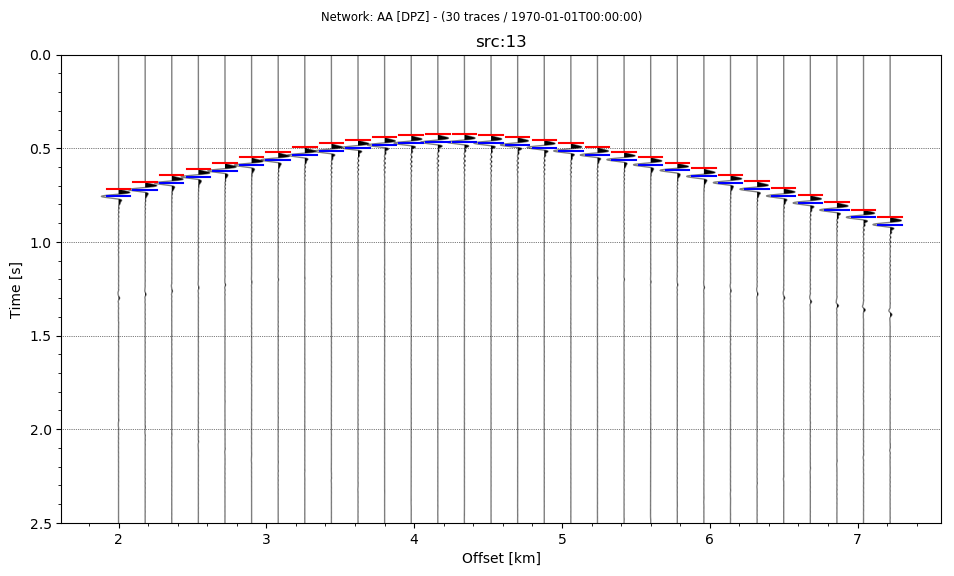

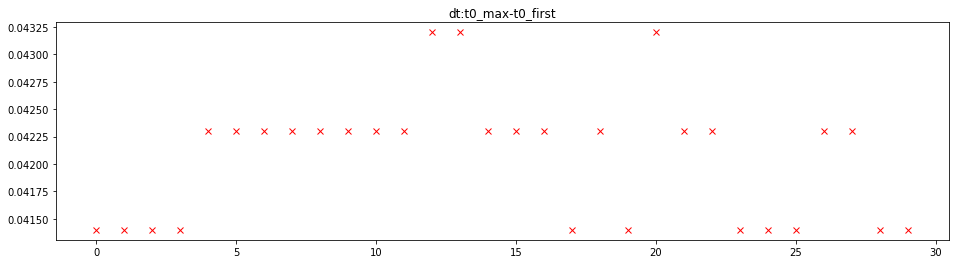

<Figure size 720x720 with 0 Axes>

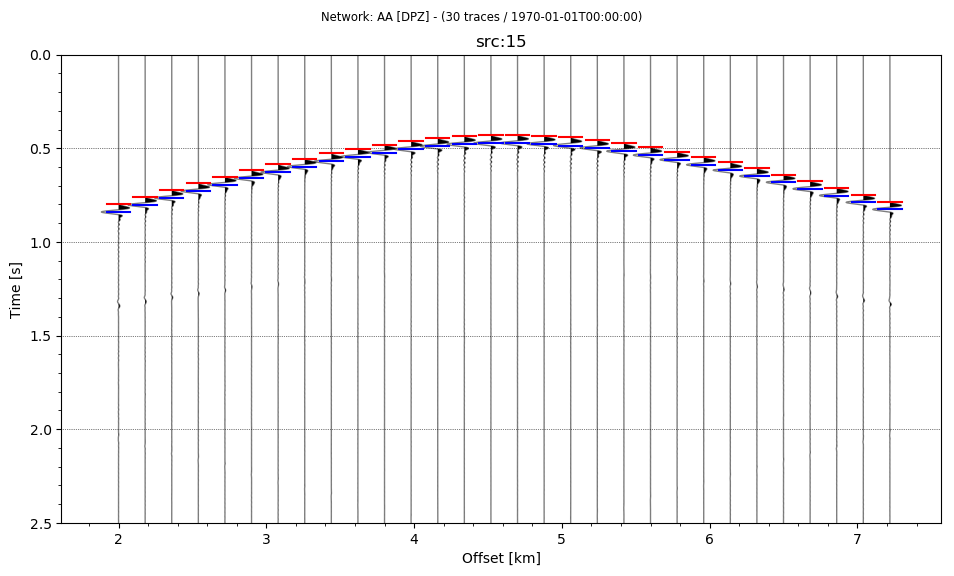

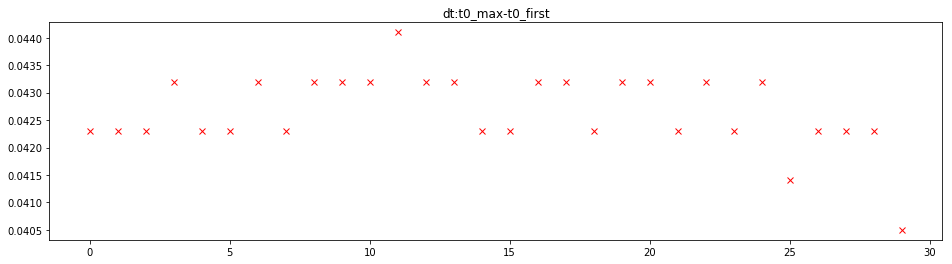

<Figure size 720x720 with 0 Axes>

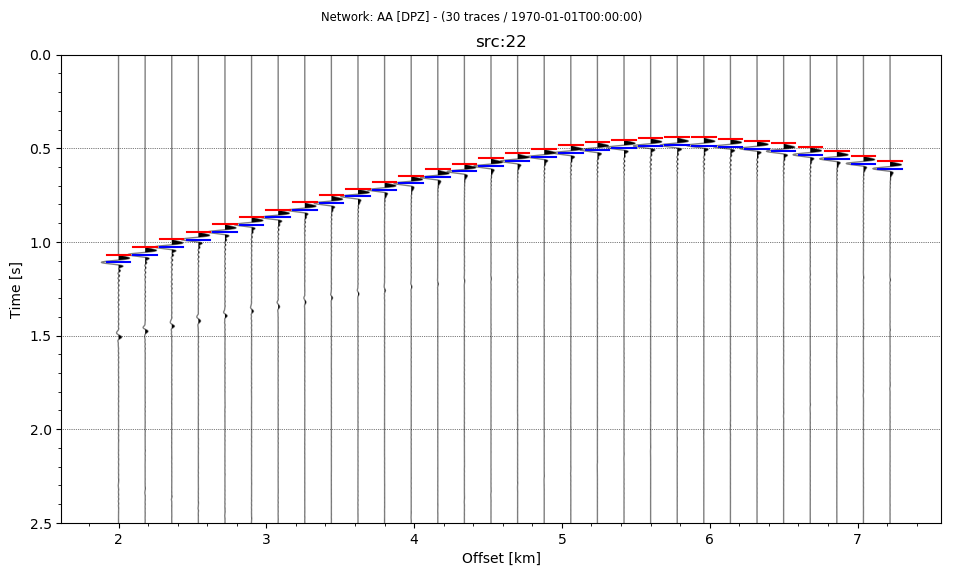

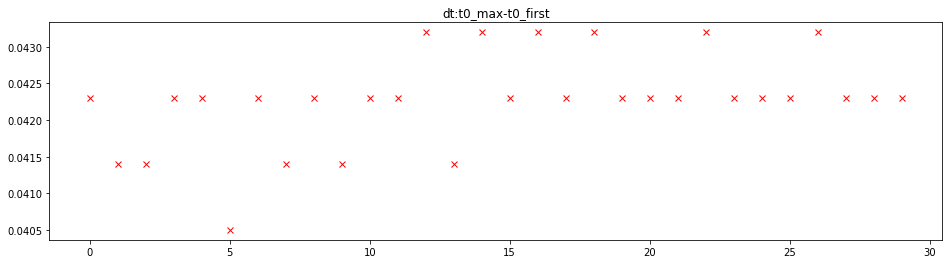

In [240]:
from obspy import read
from matplotlib import pyplot as plt
choosetoshow = [4,13,15,22]
ifplot = 1
for isrc  in range(len(choosetoshow)):
    st = read('data_homo/wfs/'+str(choosetoshow[isrc]).zfill(5)+'.su')
    plt.figure(figsize = (10,10))
    dfh = pick('data_homo/wfs/'+str(choosetoshow[isrc]).zfill(5)+'.su', './data/STATIONS',recordlength=2.5,plot=ifplot,thresh=10)
    plt.title('src:'+str(choosetoshow[isrc]))
    plt.figure(figsize = (16,4))
    timediffh = dfh['t0_max']-dfh['t0_first']
    plt.plot(timediffh,'rx')
    plt.title('dt:t0_max-t0_first')


In [ ]:
import pykonal
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

src = pd.read_table('data/sources.dat',delim_whitespace=True,names=['x','z'])
rc = pd.read_table('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

solver = pykonal.EikonalSolver()
solver.vgrid.min_coords     = 0, 0, 0
solver.vgrid.node_intervals = 1, 1, 1
# solver.vgrid.node_intervals = 0.1, 0.1, 1
solver.vgrid.npts           = 30, 92, 2
solver.pgrid.min_coords     = solver.vgrid.min_coords
solver.pgrid.node_intervals = solver.vgrid.node_intervals/4
solver.pgrid.npts           = solver.vgrid.npts*4-3
solver.vv = np.ones(solver.vgrid.npts)*4.0

srcdimz = 30
srcdimx = 92
dimr = 100
srcix = srcdimz-src['z']/dimr
srcix = np.round(srcix/solver.pgrid.node_intervals[0])
srciy = src['x']/dimr
srciy = np.round(srciy/solver.pgrid.node_intervals[1])
rcx = srcdimz-rc['z']/dimr+1.0
rcy = rc['x']/dimr

nsrc = len(srcix)
nrc = len(rcx)
dobs = np.zeros((nsrc,nrc))

solver.clear_sources()
for isrc in range(nsrc):
    print (isrc,'th source')
    srcf = (int(srcix[isrc]),int(srciy[isrc]),1)
    solver.add_source(srcf)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    
    for irc in range(len(rcx)):
        rcp = (rcx[irc],rcy[irc],0.2)
        ray = solver.trace_ray(rcp,tolerance=1e-3)
        dobs[isrc,irc] = ui(rcp)
    solver.clear_sources()

In [ ]:
#%matplotlib ipympl
import pykonal
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

## Load data

srcs = pd.read_csv('data/sources.dat',delim_whitespace=True,names=['x','z'])
rcs  = pd.read_csv('data/STATIONS',delim_whitespace=True,names=['sname','net','x','z','cc1','cc2'])

# I am using the y-axis as the vertical axis; it is positive downwards.
srcs['y'] = 3e3 - srcs['z']
# Set the z-coordinate = 0 everywhere to keep everything in the xy-plane
srcs['z'] = 0
# Again for receivers...
rcs['y']  = 3e3 - rcs['z']
rcs['z']  = 0

## Calculate travel times

# The source and receiver locations appear to be in units of [m], so I will
# use units of [m] for distance and [m/s] for velocity to stay consistent.
solver = pykonal.EikonalSolver()
solver.vgrid.min_coords     = 0, 0, 0
solver.vgrid.node_intervals = 100, 100, 1 # Node intervals in [m]
solver.vgrid.npts           = 91, 31, 2
solver.pgrid.min_coords     = solver.vgrid.min_coords
solver.pgrid.node_intervals = solver.vgrid.node_intervals
solver.pgrid.npts           = solver.vgrid.npts
solver.vv = np.ones(solver.vgrid.npts) * 4e3 # Velocity in [m/s]

dobs = np.zeros((len(srcs), len(rcs)))

for isrc, src_row in srcs.iterrows():
    src = src_row[['x', 'y', 'z']]
    solver.clear_sources()
#     print src
    solver.add_source(src)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    for irc, rc_row in rcs.iterrows():
        rc  = rc_row[['x', 'y', 'z']]

## Plotting

def plot(solver):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.pcolormesh(
        solver.pgrid[:, :, 0, 0], 
        solver.pgrid[:, :, 0, 1], 
        solver.uu[:, :, 0], 
        cmap=plt.get_cmap('jet_r')
    )
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.invert_yaxis()

plot(solver)


In [ ]:
solver = pykonal.EikonalSolver()
solver.vgrid.min_coords     = 0, 0, 0
solver.vgrid.node_intervals = 1, 1, 1
# solver.vgrid.node_intervals = 0.1, 0.1, 1
solver.vgrid.npts           = 92, 31, 1
solver.pgrid.min_coords     = solver.vgrid.min_coords
solver.pgrid.node_intervals = solver.vgrid.node_intervals/4
solver.pgrid.npts           = solver.vgrid.npts*4-3
solver.vv = np.ones(solver.vgrid.npts)*4.0
srcf = (184, 50, 0)
solver.add_source(srcf)
solver.solve()
print('finishing ')

#ray = solver.trace_ray((0.2,0.2,0.1),tolerance=1e-4)
ray = solver.trace_ray((54.1,1,0),tolerance=1e-4)
fig = plt.figure(figsize=(10,4))
plt.imshow(solver.uu[:,:,0].T,extent=(0,92,30,0),cmap='jet')
# plt.imshow(solver.uu[:,:,0],extent=(0,9.2,3.0,0),cmap='jet')
plt.plot(ray[:,0],ray[:,1])

In [ ]:
srcdimz = 30
srcdimx = 92
dimr = 100
srcix = srcdimz-src['z']/dimr
srcix = np.round(srcix/solver.pgrid.node_intervals[0])
srciy = src['x']/dimr
srciy = np.round(srciy/solver.pgrid.node_intervals[1])
print srcix
rcx = srcdimz-rc['z']/dimr
rcy = rc['x']/dimr

vel = np.ones(solver.vgrid.npts)*4.0
vel[35:55,:,:] = 3.0
solver.vv = vel


solver.clear_sources()

nsrc = len(srcix)
nrc = len(rcx)
dobs = np.zeros((nsrc,nrc))

for isrc in range(nsrc):
    print (isrc,'th source')
    srcf = (int(srciy[isrc]),int(srcix[isrc]),0)
    solver.add_source(srcf)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    
    for irc in range(len(rcx)):
        rcp = (rcy[irc],rcx[irc],0)
#         ray = solver.trace_ray(rcp,tolerance=1e-1)
        dobs[isrc,irc] = ui(rcp)
#         plt.plot(ray[:,1],ray[:,0])
    solver.clear_sources()
    
plt.imshow(solver.vv[:,:,0].T)
print('generating synthetic data finished')

# Ray tracing

In [ ]:
from collections import defaultdict
fig = plt.figure(figsize=(10,4))
# plt.imshow(solver.vv[:,:,0],extent=(0,92,30,0),cmap='jet')
solver.vv = np.ones(solver.vgrid.npts)*4.0

raypath = defaultdict(list)
solver.clear_sources()

nsrc = len(srcix)
nrc = len(rcx)
dsyn = np.zeros((nsrc,nrc))

for isrc in range(nsrc):
    print (isrc,'th source')
    srcf = (int(srciy[isrc]),int(srcix[isrc]),0)
    solver.add_source(srcf)
    solver.solve()
    ui = pykonal.LinearInterpolator3D(solver.pgrid, solver.uu)
    
    for irc in range(len(rcx)):
        rcp = (rcy[irc],rcx[irc],0)
        ray = solver.trace_ray(rcp,tolerance=1e-1)
        dsyn[isrc,irc] = ui(rcp)
        raypath['src'+str(isrc)+'rc'+str(irc)] = ray[:,0:2]
    solver.clear_sources()
print('finishing ray tracing')    

In [19]:
def voronoicells(n,m,ncell = 50,adaptive=False,acell=500,secw=0,sece=10,secn=0,secs=10):    
    pos = np.zeros((ncell,2))
    #print(iset)
    pos[:,0] = np.random.rand(ncell,)*n
    pos[:,1] = np.random.rand(ncell,)*m
    if adaptive:
        ncella = acell
        posa = np.zeros((ncella,2))
        posa[:,0] = np.random.rand(ncella,)*(sece-secw)+secw
        posa[:,1] = np.random.rand(ncella,)*(secs-secn)+secn
        pos = np.vstack([pos,posa])
        ncell += ncella
    tri = Delaunay(pos)
    neiList=defaultdict(list)
    for p in tri.vertices:
        for i,j in itertools.combinations(p,2):
            neiList[i+1].append(j+1)
            neiList[j+1].append(i+1)
    for p in range(1,1+len(pos)):
        neiList[0].append(p)
    neiList[0] = np.unique(neiList[0])
    for p in range(1,len(pos)+1):
        neiList[p].append(p)
        neiList[p] = np.unique(neiList[p])
    return pos,neiList

# Synthetic test with traveltime data

In [ ]:
# for projection matrix  
from scipy.sparse import coo_matrix
from scipy.spatial import Delaunay
from collections import defaultdict
import itertools
from scipy.sparse.linalg import lsmr

vmean = 4.0
nsets = 2
n = 92
m = 31
ncells = 50
acells = 200
secw = 20
sece = 70
secn = 0
secs = 20
adaptive = True
mdim = m*n
xall = np.zeros(mdim,)
stdx = np.zeros(mdim,)
xx = np.linspace(solver.vgrid.min_coords[0],solver.vgrid.max_coords[0],solver.vgrid.npts[0])
yy = np.linspace(solver.vgrid.min_coords[1],solver.vgrid.max_coords[1],solver.vgrid.npts[1])
for iset in range(nsets):
    print iset,'th set'
    pos,neiList = voronoicells(n,m,ncell = ncells,adaptive=adaptive,acell=acells,secw=secw,sece=sece,secn=secn,secs=secs)
    ncell = ncells+acells
    colid = np.zeros(mdim,dtype=int)
    rowid = np.zeros(mdim,dtype=int)
    nones = np.zeros(ncell,)
    mmidx = 0
    idx = 0
    for jj in range(n):
        for ii in range(m):
            #mmidx = 0
            findpts = neiList[mmidx]-1
            #idx = jj*m+ii
            dis = (xx[jj]-pos[findpts,0])**2+(yy[ii]-pos[findpts,1])**2
            midx = np.argmin(dis)
            colid[idx] = findpts[midx]#midx
            idxt = neiList[mmidx][midx]
            mmidx = int(idxt*np.sign(ii))
            rowid[idx] = idx
            nones[findpts[midx]] += 1
            idx += 1
    Gp = coo_matrix((np.ones(mdim,),(rowid,colid)),shape=(mdim,ncell))
    
    # for each ray
    nnzero = int(0.1*nsrc*nrc*ncell)
    colid = np.zeros(nnzero,dtype=int)
    rowid = np.zeros(nnzero,dtype=int)
    nzero = np.zeros(nnzero,)
    mmidx = 0
    idx = 0
    dres = np.zeros(nsrc*nrc,)
    nzidx = 0
    for isrc in range(nsrc):
        for irc in range(nrc):
            ray = raypath['src'+str(isrc)+'rc'+str(irc)]
            ndist = np.sqrt((ray[1:,0]-ray[:-1,0])**2+(ray[1:,1]-ray[:-1,1])**2)
            nseg = len(ndist)
            colidray = np.zeros(nseg,dtype=int)
            for iray in range(nseg):
                findpts = neiList[mmidx]-1
                #idx = jj*m+ii
                dis = (ray[iray,0]-pos[findpts,0])**2+(ray[iray,1]-pos[findpts,1])**2
                midx = np.argmin(dis)
                colidray[iray] = findpts[midx]#midx
                mmidx = neiList[mmidx][midx]
            uidx = np.unique(colidray)
            nnzeroray = len(uidx)
            for ii in range(nnzeroray):
                colid[nzidx] = uidx[ii]
                rowid[nzidx] = idx
                idxt = np.where(colidray==uidx[ii])[0]
                nzero[nzidx] = np.sum(ndist[idxt])   
                nzidx += 1
            dres[idx] = dobs[isrc,irc]-dsyn[isrc,irc]
            idx += 1

    nzero = nzero[:nzidx]
    rowid = rowid[:nzidx]
    colid = colid[:nzidx]
    G = coo_matrix((nzero,(rowid,colid)),shape = (idx,ncell))

    damp = 0.0
    atol = 1e-2
    btol = 1e-3
    conlim = 100
    maxiter = 200
    print('lsmr begin')
    xsub = lsmr(G,dres,damp,atol,btol,conlim,maxiter,show=False)
    # rescaling
    xsub = xsub[0]

    # project it back to high dimension
    x = Gp*xsub
    xall += x
    stdx += x**2
xall = xall/nsets
stdx = np.sqrt(0.0001+stdx/nsets-xall**2)

xall = vmean-vmean**2*xall
stdx = stdx*vmean**2

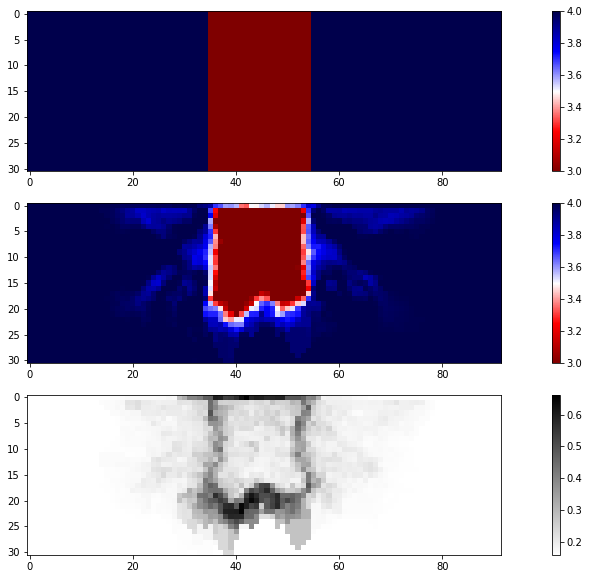

In [167]:
fig = plt.subplots(nrows=3,ncols=1,figsize=(18,10))
plt.subplot(311)
xinv = vel.flatten()
plt.imshow(xinv.reshape(n,m).T,cmap='seismic_r')
plt.colorbar()
plt.subplot(312)
xinv = xall.reshape(m,n)
plt.imshow(xinv.reshape(n,m).T,cmap='seismic_r',vmin=3.0,vmax=4.0)
plt.colorbar()
plt.subplot(313)
xinv = stdx.reshape(m,n)
plt.imshow(xinv.reshape(n,m).T,cmap='gray_r')
plt.colorbar()

In [213]:
def pick(wf_file, md_file, recordlength=1.5, thresh = 5.0, plot=False):
    df_sta = pd.read_csv(md_file, delim_whitespace=True, header=None, names=['sta', 'net', 'x', '_y', '?', '??'])
    df_sta['y'] = 3e3 - df_sta['_y']
    
    df = pd.DataFrame()
    st = obspy.read(wf_file)
    for idx in range(len(st)):
        tr = st[idx]
        tr.stats.network  = 'AA'
        tr.stats.station  = df_sta.loc[idx, 'sta']
        tr.stats.channel  = 'DPZ'
        tr.stats.distance = df_sta.loc[idx, 'x']
#         thresh = thresh*np.max(np.abs(tr))/np.median(np.abs(tr))
#         print np.median(np.abs(tr))
        firstarr = np.nonzero(tr.data > np.median(np.abs(tr)) * thresh)[0][0]
        tr.stats.t0_first = firstarr * tr.stats.delta
#         tr.stats.t0_max   = np.argmin(np.abs(tr)) * tr.stats.delta
        window = int(0.3/tr.stats.delta)
        tr.stats.t0_max   = (firstarr+np.argmax(abs(tr.data[firstarr:firstarr+window])))*tr.stats.delta
        df = df.append(
            pd.DataFrame(
                [[tr.stats.station, tr.stats.t0_first, tr.stats.t0_max]],
                columns=['sta', 't0_first', 't0_max']
            ),
            ignore_index=True
        )

    if plot:
        fig = st.plot(
            type='section', 
            time_down=True,
            recordlength=recordlength,
            fillcolors=('k', 'w'), 
            handle=True
        )

        ax = fig.axes[0]
        xmin, xmax = ax.get_xlim()
        delta_x    = xmax - xmin

        pick_marker_half_width = 1/(2.5*len(st))
        for tr in st:
            ax.axhline(
                y=tr.stats.t0_first,
                xmin=(tr.stats.distance * 1e-3 - xmin)/delta_x-pick_marker_half_width,
                xmax=(tr.stats.distance * 1e-3 - xmin)/delta_x+pick_marker_half_width,
                color='r'
            )
            ax.axhline(
                y=tr.stats.t0_max,
                xmin=(tr.stats.distance * 1e-3 - xmin)/delta_x-pick_marker_half_width,
                xmax=(tr.stats.distance * 1e-3 - xmin)/delta_x+pick_marker_half_width,
                color='b'
            )
    return (df)

# Pick first and envelop arrivals

In [ ]:
dobs = np.zeros(nsrc*nrc,)
idx = 0
import obspy
for isrc in range(nsrc):
    sufile = str(isrc).zfill(5)+'.su'
    df = pick('./data/wfs/'+sufile, './data/STATIONS',recordlength=2.5,plot=True,thresh=10.0)
    for irc in range(1,len(df)):
        dobs[idx] = df['t0_max'].iloc[irc]-df['t0_first'].iloc[irc]-0.042
        idx += 1


# Inversion with scattering data

In [ ]:
nsets = 10
xall = np.zeros(mdim,)
stdx = np.zeros(mdim,)
xx = np.linspace(solver.vgrid.min_coords[0],solver.vgrid.max_coords[0],solver.vgrid.npts[0])
yy = np.linspace(solver.vgrid.min_coords[1],solver.vgrid.max_coords[1],solver.vgrid.npts[1])
for iset in range(nsets):
    print iset,'th set'
    pos,neiList = voronoicells(n,m,ncell = ncells,adaptive=adaptive,acell=acells,secw=secw,sece=sece,secn=secn,secs=secs)
    ncell = ncells+acells
    colid = np.zeros(mdim,dtype=int)
    rowid = np.zeros(mdim,dtype=int)
    nones = np.zeros(ncell,)
    mmidx = 0
    idx = 0
    for jj in range(n):
        for ii in range(m):
            #mmidx = 0
            findpts = neiList[mmidx]-1
            #idx = jj*m+ii
            dis = (xx[jj]-pos[findpts,0])**2+(yy[ii]-pos[findpts,1])**2
            midx = np.argmin(dis)
            colid[idx] = findpts[midx]#midx
            idxt = neiList[mmidx][midx]
            mmidx = int(idxt*np.sign(ii))
            rowid[idx] = idx
            nones[findpts[midx]] += 1
            idx += 1
    Gp = coo_matrix((np.ones(mdim,),(rowid,colid)),shape=(mdim,ncell))
    
    # for each ray
    nnzero = int(0.1*nsrc*nrc*ncell)
    colid = np.zeros(nnzero,dtype=int)
    rowid = np.zeros(nnzero,dtype=int)
    nzero = np.zeros(nnzero,)
    mmidx = 0
    idx = 0
    dres = np.zeros(nsrc*nrc,)
    nzidx = 0
    for isrc in range(nsrc):
        for irc in range(nrc):
            ray = raypath['src'+str(isrc)+'rc'+str(irc)]
            ndist = np.sqrt((ray[1:,0]-ray[:-1,0])**2+(ray[1:,1]-ray[:-1,1])**2)
            nseg = len(ndist)
            colidray = np.zeros(nseg,dtype=int)
            for iray in range(nseg):
                findpts = neiList[mmidx]-1
                #idx = jj*m+ii
                dis = (ray[iray,0]-pos[findpts,0])**2+(ray[iray,1]-pos[findpts,1])**2
                midx = np.argmin(dis)
                colidray[iray] = findpts[midx]#midx
                mmidx = neiList[mmidx][midx]
            uidx = np.unique(colidray)
            nnzeroray = len(uidx)
            for ii in range(nnzeroray):
                colid[nzidx] = uidx[ii]
                rowid[nzidx] = idx
                idxt = np.where(colidray==uidx[ii])[0]
                nzero[nzidx] = np.sum(ndist[idxt])   
                nzidx += 1
            #dres[idx] = dobs[isrc,irc]-dsyn[isrc,irc]
            idx += 1
    weight = np.ones(idx,)
    outlier = np.where(np.abs(dobs)>0.015)[0]
    weight[outlier] = 0
    dobsw = weight*dobs
    for ii in range(nzidx):
        nzero[ii] = nzero[ii]*weight[rowid[ii]]
    nzero = nzero[:nzidx]
    rowid = rowid[:nzidx]
    colid = colid[:nzidx]
    
    G = coo_matrix((nzero,(rowid,colid)),shape = (idx,ncell))

    damp = 0.0
    atol = 1e-2
    btol = 1e-3
    conlim = 100
    maxiter = 200
    print('lsmr begin')
    xsub = lsmr(G,dobsw,damp,atol,btol,conlim,maxiter,show=False)
#     xsub = nnls(G.todense(),dobs)
    # rescaling
    xsub = xsub[0]

    # project it back to high dimension
    x = Gp*xsub
    xall += x
    stdx += x**2
xall = xall/nsets
stdx = np.sqrt(0.0001+stdx/nsets-xall**2)

xall = vmean-vmean**2*xall
stdx = stdx*vmean**2

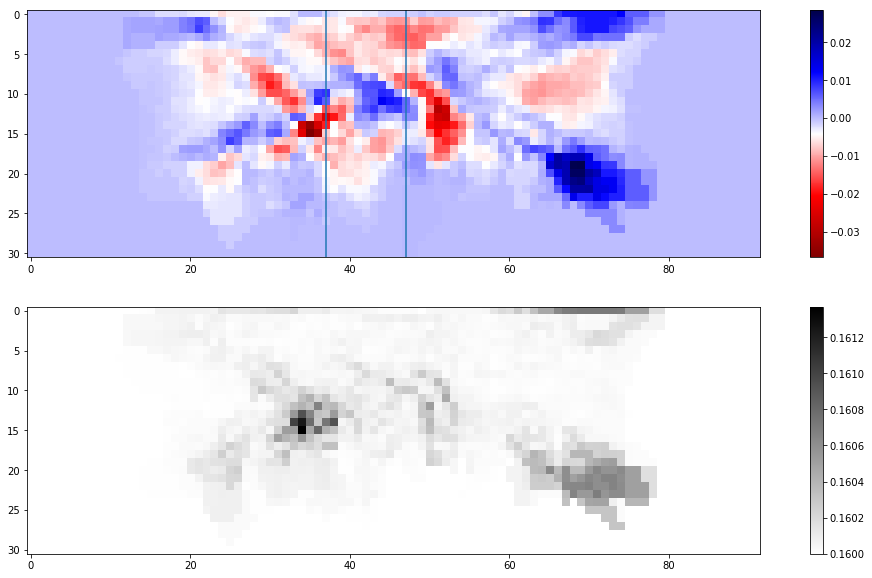

In [54]:
fig = plt.subplots(nrows=2,ncols=1,figsize=(18,10))
plt.subplot(211)
xinv = xall.reshape(m,n)
plt.imshow(xinv.reshape(n,m).T-4.0,cmap='seismic_r')
plt.axvline(x=37)
plt.axvline(x=47)
plt.colorbar()
plt.subplot(212)
xinv = stdx.reshape(m,n)
plt.imshow(xinv.reshape(n,m).T,cmap='gray_r')
plt.colorbar()

In [ ]:
from obspy import read
isrc = 1
fig = plt.figure(figsize=(15,10))

st = read('data_homo/wfs/'+str(isrc).zfill(5)+'.su')
#fig = plt.figure(figsize=(15,10))
for ii in range(len(st)):
    st[ii].stats.distance=ii*1000/50.0*9.2
st.plot(type='section',scale=1.0,time_down=True,recordlength=2.5,fillcolors=('yellow','None'),fig=fig)

fig = plt.figure(figsize=(15,10))
st = read('data/wfs/'+str(isrc).zfill(5)+'.su')
for ii in range(len(st)):
    st[ii].stats.distance=ii*1000/50.0*9.2
st.plot(type='section',scale=1.0,time_down=True,recordlength=2.5,fillcolors=('red','None'),fig=fig)


#plt.title('src:'+str(choosetoshow[isrc]))

In [ ]:
from scipy.signal import hilbert
st = read('data_homo/wfs/'+str(isrc).zfill(5)+'.su')
# st[-1].plot()
tr = st[2]
print np.median(np.abs(tr))
firstarr = np.nonzero(tr.data > np.median(np.abs(tr)) * 5)[0][0]
plt.figure(figsize=(15,3))
plt.plot(tr.data)
plt.plot(abs(hilbert(tr.data)))
# plt.axvline(x=firstarr)
print firstarr*tr.stats.delta

In [ ]:
isrc = 4
ifplot = 1
for isrc in range(1,5):
    dfh = pick('data_homo/wfs/'+str(isrc).zfill(5)+'.su', './data/STATIONS',recordlength=2.5,plot=ifplot,thresh=10)
    df = pick('data/wfs/'+str(isrc).zfill(5)+'.su', './data/STATIONS',recordlength=2.5,plot=ifplot,thresh=10)
    plt.figure(figsize=(10,4))
    timediff = df['t0_max']-df['t0_first']
    timediffh  = dfh['t0_max']-dfh['t0_first']
    plt.plot(timediffh,'rx')
    plt.plot(timediff,'bo')
    plt.title(str(isrc))